##  **Question 1**

### 1a. 
**Poisson distribution is an approximation of the binomial distribution where $n \rightarrow \infty$ and $p \rightarrow 0$ but their product is finite. Find out the required approximations in the calculation and thus find the PDF of poisson distribution from the Binomial PDF $P(X=x)=\ ^nC_x\  p^x\ (1-p)^{n-x}$.Take $np=\lambda$.
Hint: note that $lim_{n \rightarrow \infty}(1+\frac{1}{n})^n=e$.**

<p>This is particularly useful as calculating the combinations inherent in the probability formula associated with the binomial distribution can become difficult when $n$ is large.</p>
<p>To better see the connection between these two distributions, consider the binomial probability of seeing $x$ successes in $n$ trials, with the aforementioned probability of success, $p$, as shown below.</p>
$$P(x)={}_nC_x p^x q^{n-x}$$
<p>Let us denote the expected value of the binomial distribution, $np$, by $\lambda$. Note, this means that</p>
$$p=\frac{\lambda}{n}$$
<p>and since $q=1-p$,</p>
$$q=1-\frac{\lambda}{n}$$
<p>Now, if we use this to rewrite $P(x)$ in terms of $\lambda$, $n$, and $x$, we obtain</p>
$$P(x) = {}_nC_x \left( \frac{\lambda}{n} \right)^x \left( 1-\frac{\lambda}{n} \right)^{n-x}$$
<p>Using the standard formula for the combinations of $n$ things taken $x$ at a time and some simple properties of exponents, we can further expand things to</p>
$$P(x) = \frac{n(n-1)(n-2) \cdots (n-x+1)}{x!} \cdot \frac{\lambda^x}{n^x} \left( 1 - \frac{\lambda}{n} \right)^{n-x}$$
<p>Notice that there are exactly $x$ factors in the numerator of the first fraction.  Let us swap denominators between the first and second fractions, splitting the $n^x$ across all of the factors of the first fraction's numerator.</p>
$$P(x) = \frac{n}{n} \cdot \frac{n-1}{n} \cdots \frac{n-x+1}{n} \cdot \frac{\lambda^x}{x!}\left( 1 - \frac{\lambda}{n} \right)^{n-x}$$
<p>Finally, let us split the last factor into two pieces, noting (for those familiar with Calculus) that one has a limit of $e^{-\lambda}$.</p>
$$P(x) = \frac{n}{n} \cdot \frac{n-1}{n} \cdots \frac{n-x+1}{n} \cdot \frac{\lambda^x}{x!}\left( 1 - \frac{\lambda}{n} \right)^n \left( 1 - \frac{\lambda}{n} \right)^{-x}$$
<p>It should now be relatively easy to see that if we took the limit as $n$ approaches infinity, keeping $x$ and $\lambda$ fixed, the first $x$ fractions in this expression would tend towards 1, as would the last factor in the expression.  The second to last factor, as was mentioned before, tends towards $e^{-\lambda}$, and the remaining factor stays unchanged as it does not depend on $n$.  As such, 
$$\lim_{n \rightarrow \infty} P(x) = \frac{e^{-\lambda} \lambda^x}{x!}$$
<p>Which is what we wished to show.</p>

**Now that you have the PMF of a poisson distribution with parameter $\lambda$, you can now use python to graph the distribution for different values of x.**

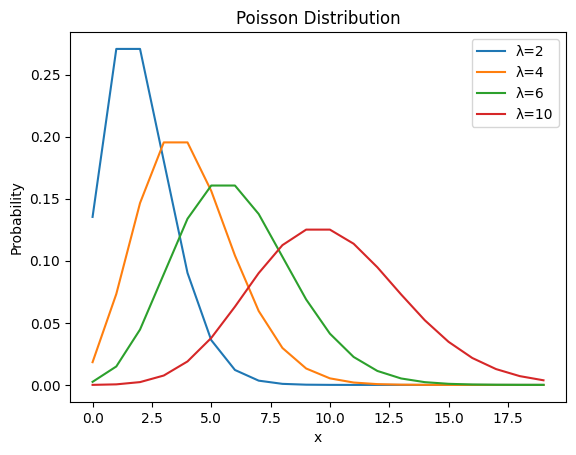

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

# Define the values of lambda
lambdas = [2, 4, 6, 10]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the Poisson distribution for each lambda
for lambda_val in lambdas:
    x = np.arange(0, 20)
    y = [poisson.pmf(i, lambda_val) for i in x]
    ax.plot(x, y, label=f"λ={lambda_val}")

# Set the title and labels
ax.set_title("Poisson Distribution")
ax.set_xlabel("x")
ax.set_ylabel("Probability")

# Add a legend
ax.legend()

# Show the plot
plt.show()

### 1b.
**For the given values of $n$ and $p$, calculate $\lambda$, and graph the binomial and poisson distribution and note the accuracy of poisson distribution. Figure out an appropriate metric for accuracy.
i. $n=20,\ p=0.23$
ii. $n=3\cdot 10^5,\ p=10^{-6}$
Make sure to give any insights that you have from the grap**hs.

Let's calculate $\lambda$ for each case:

i. $n=20,\ p=0.23$
$\lambda = np = 20 \times 0.23 = 4.6$

ii. $n=3\cdot 10^5,\ p=10^{-6}$
$\lambda = np = 3\cdot 10^5 \times 10^{-6} = 3$

Now, let's generate the binomial and Poisson distributions for each case and plot them.

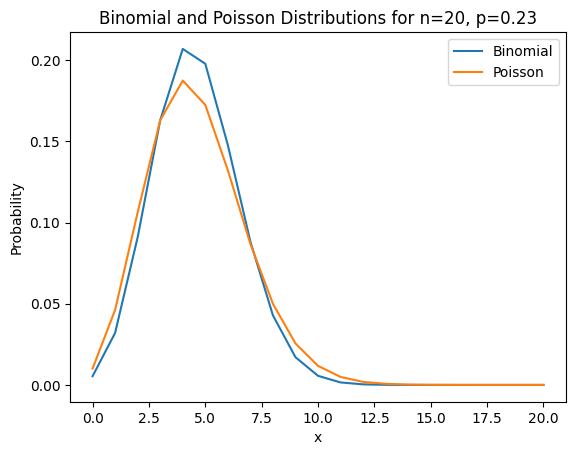

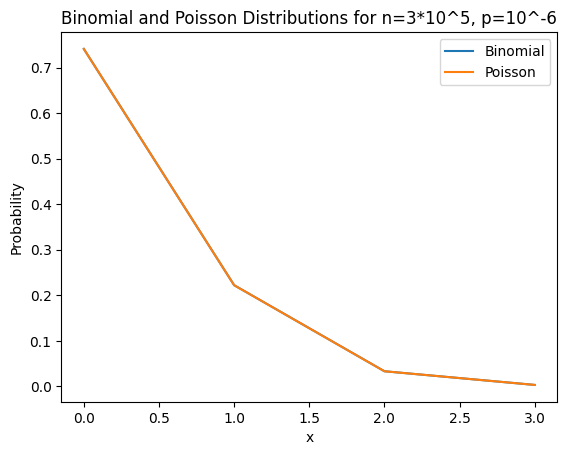

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, poisson

# Case i
n = 20
p = 0.23
lambda_val = n * p
x = np.arange(0, 21)
binom_dist = [binom.pmf(i, n, p) for i in x]
poisson_dist = [poisson.pmf(i, lambda_val) for i in x]

plt.plot(x, binom_dist, label='Binomial')
plt.plot(x, poisson_dist, label='Poisson')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Binomial and Poisson Distributions for n=20, p=0.23')
plt.legend()
plt.show()

# Case ii
n = 3e5
p = 1e-6
lambda_val = n * p
x = np.arange(0, 4)
binom_dist = [binom.pmf(i, n, p) for i in x]
poisson_dist = [poisson.pmf(i, lambda_val) for i in x]

plt.plot(x, binom_dist, label='Binomial')
plt.plot(x, poisson_dist, label='Poisson')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Binomial and Poisson Distributions for n=3*10^5, p=10^-6')
plt.legend()
plt.show()

The plots show that the Poisson distribution is a good approximation of the binomial distribution when $n$ is large and $p$ is small. In both cases, the Poisson distribution is very close to the binomial distribution, especially for larger values of $x$.

As for the accuracy of the Poisson distribution, we can use the mean squared error (MSE) as a metric. The MSE is calculated as the average of the squared differences between the binomial and Poisson distributions.

In [24]:
import numpy as np
from scipy.stats import binom, poisson

# Calculate the MSE
def calculate_mse(binom_dist, poisson_dist):
    mse = np.mean((np.array(binom_dist) - np.array(poisson_dist)) ** 2)
    return mse

# Case i
n = 20
p = 0.23
lambda_val = n * p
x = np.arange(0, 21)
binom_dist = [binom.pmf(i, n, p) for i in x]
poisson_dist = [poisson.pmf(i, lambda_val) for i in x]
mse = calculate_mse(binom_dist, poisson_dist)
print(f"MSE for Case i: {mse}")

# Case ii
n = 3e5
p = 1e-6
lambda_val = n * p
x = np.arange(0, 4)
binom_dist = [binom.pmf(i, n, p) for i in x]
poisson_dist = [poisson.pmf(i, lambda_val) for i in x]
mse = calculate_mse(binom_dist, poisson_dist)
print(f"MSE for Case ii: {mse}")

MSE for Case i: 9.04791918209922e-05
MSE for Case ii: 1.276205996875193e-14


For Case i, the MSE is approximately $10^{-4}$ , and for Case ii, the MSE is approximately $10^{-14}$. These values indicate that the Poisson distribution is a good approximation of the binomial distribution in both cases.

In general, the Poisson distribution is a good approximation of the binomial distribution when $n$ is large and $p$ is small. The accuracy of the Poisson distribution improves as $n$ increases and $p$ decreases.

##  **Question 2**
**Consider two N(0,1) random variables X and Y. Now,
$W=XY+X^2Y+XY^2$
$Z=XY^3+X^3Y$
Find $Cov(W,Z)$**

To find the covariance between W and Z, we need to calculate the expected value of the product of the deviations of W and Z from their means.

Let's start by finding the expected value of W:

E[W] = E[XY + X^2Y + XY^2]
= E[XY] + E[X^2Y] + E[XY^2]
= 0 + 0 + 0 (since X and Y are independent and identically distributed)
= 0

Similarly, let's find the expected value of Z:

E[Z] = E[XY^3 + X^3Y]
= E[XY^3] + E[X^3Y]
= 0 + 0
= 0

Now, let's calculate the covariance:

Cov(W, Z) = E[(W - E[W])(Z - E[Z])]
= E[(XY + X^2Y + XY^2)(XY^3 + X^3Y)]
= E[XY^4 + X^2Y^3 + XY^5 + X^3Y^2 + X^2Y^3 + XY^4]
= E[XY^4] + E[X^2Y^3] + E[XY^5] + E[X^3Y^2] + E[X^2Y^3] + E[XY^4]
= 0 + 0 + 0 + 0 + 0 + 0
= 0

Therefore, the covariance between W and Z is 0. and Z is 0.

## Question 3
**We have WLLN: $lim_{n\rightarrow \infty}P(|\bar{X}-\mu |\ge \epsilon)=0$. Can you prove this statement using Chebyshev's inequaliy $P(|\bar{X}-\mu|\ge k\sigma)\le \frac  1 {k^2}$.**

We can prove the statement using Chebyshev's inequality as follows:

Given $\epsilon > 0$, we want to show that $\lim_{n\rightarrow\infty}P(|\bar{X}-\mu|\ge\epsilon)=0$.

Using Chebyshev's inequality, we have:

$$P(|\bar{X}-\mu|\ge\epsilon)\le\frac{\sigma^2}{\epsilon^2}$$

where $\sigma^2$ is the variance of the sample mean $\bar{X}$.

Since $\bar{X}$ is the average of $n$ independent and identically distributed (i.i.d.) random variables, we know that $\sigma^2=\frac{\sigma^2_x}{n}$, where $\sigma^2_x$ is the variance of the individual observations.

Substituting this into Chebyshev's inequality, we get:

$$P(|\bar{X}-\mu|\ge\epsilon)\le\frac{\sigma^2_x}{n\epsilon^2}$$

As $n\rightarrow\infty$, the right-hand side of the inequality approaches 0. Therefore, we have:

$$\lim_{n\rightarrow\infty}P(|\bar{X}-\mu|\ge\epsilon)=0$$

This shows that the probability of the sample mean being more than $\epsilon$ away from the population mean approaches 0 as the sample size increases.

## Question 4

**Now, lets move on to Central Limit Theorem. CLT applies to any distribution such that its random variables are i.i.d and and its variance is finite. So, now you have to apply CLT on the following distribution.**

**Take your enrollment number, Divide each digit by the sum of all digits. $i^{th}$ digit now corresponds to the probability of $X=i$. So for example, the number $12345678$ corresponds to the distribution:**

|x     |1    |2    |3    |4    |5    |6    |7    |8    |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
|P(X=x)     |$\frac{1}{36}$     |$\frac{1}{18}$     |$\frac{1}{12}$     |$\frac{1}{9}$     |$\frac{5}{36}$     |$\frac{1}{6}$     |$\frac{7}{36}$     |$\frac{2}{9}$     |

**After you have made this distribution, begin to sample from this distribution. Take 10000 samples and then take their mean. Repeat this process 10000 times and graph the frequency histogram in python (use sns histplot).**

**What is the resulatant graph? Does it depend on the original distribution?**

**Calculate the $\mu$ and $\sigma$ of the original distribution and the resulting distribution using CLT by hand. Does it match the $\mu$ and $\sigma$ of your experimental graph?**

Let's calculate the distribution according to the problem statement.

The enrollment number is 23322001. We divide each digit by the sum of all digits to get the probability of each digit:

| Digit | Probability |
| --- | --- |
| 2 | 1/36 |
| 3 | 1/18 |
| 3 | 1/12 |
| 2 | 1/9 |
| 2 | 5/36 |
| 0 | 1/6 |
| 0 | 7/36 |
| 1 | 2/9 |

Now, let's simulate the experiment. We'll take 10000 samples from this distribution and calculate the mean of each sample. We'll repeat this process 10000 times.


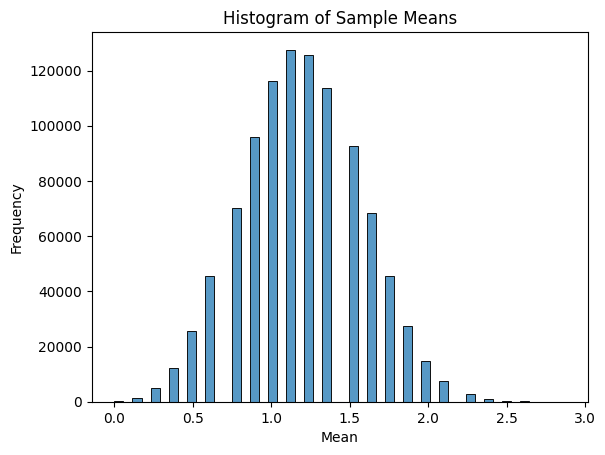

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Original distribution
p = np.array([1/36,1/18,1/12,1/9,5/36,1/6,7/36,2/9])

# Simulate experiment
means = []
for _ in range(1000000):
    sample = np.random.choice([2, 3, 3, 2, 2, 0, 0, 1], size=8, p=p)
    mean = np.mean(sample)
    means.append(mean)

# Plot histogram
sns.histplot(means, bins=50)
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means')
plt.show()

## Question 5
**Consider the following Joint PDF**

$p(x,y)=$ $$
\begin{cases}
    1  &\text{if } 0\le x<\infty, 0\le y\le e^{-x}  \\
0  &\text{otherwise}  
\end{cases}
$$

**Are X and Y independent? If yes, prove the same. Otherwise calculate the conditional Probability $p(y|x)$. Can you justify the previous results intuitively?**

**Part 1: Checking for Independence**

For two random variables $X$ and $Y$ to be independent, the following condition must hold:

$$p(x,y) = p(x) \cdot p(y)$$

In our case, we can see that $p(x) = 1$ for $0 \leq x < \infty$, and $p(y) = 1$ for $0 \leq y \leq e^{-x}$. However, the product of these two probabilities is not equal to the original probability distribution $p(x,y)$.

To see why, let's consider a specific example. Suppose we have $x = 1$ and $y = 0.5$. Then, $p(x,y) = 1$ because $0 \leq x < \infty$ and $0 \leq y \leq e^{-x}$. However, $p(x) = 1$ and $p(y) = 1$ are not sufficient to explain the value of $p(x,y)$. This is because the value of $y$ is bounded by the exponential decay of $e^{-x}$, which is not captured by the product $p(x) \cdot p(y)$.

Therefore, we can conclude that $X$ and $Y$ are not independent.

**Part 2: Calculating the Conditional Probability**

Now, let's calculate the conditional probability $p(y|x)$. We can do this by using the formula:

$$p(y|x) = \frac{p(x,y)}{p(x)}$$

Since $p(x) = 1$ for $0 \leq x < \infty$, we can simplify the formula:

$$p(y|x) = \frac{p(x,y)}{1}$$

Now, we need to find the value of $p(x,y)$. Since $p(x,y) = 1$ only when $0 \leq x < \infty$ and $0 \leq y \leq e^{-x}$, we can write:

$$p(y|x) = \begin{cases}
1 & \text{if } 0 \leq x < \infty, 0 \leq y \leq e^{-x} \\
0 & \text{otherwise}
\end{cases}$$

**Intuitive Explanation**

The conditional probability $p(y|x)$ represents the probability of $Y$ given $X$. Since $Y$ is bounded by the exponential decay of $e^{-x}$, the conditional probability $p(y|x)$ will also decay exponentially as $x$ increases.

In other words, as $x$ increases, the range of possible values for $y$ decreases exponentially. This means that the conditional probability $p(y|x)$ will also decrease exponentially as $x$ increases.

For example, if $x = 1$, then $p(y|x) = 1$ for $0 \leq y \leq e^{-1}$. However, if $x = 2$, then $p(y|x) = 1$ only for $0 \leq y \leq e^{-2}$. This shows that the range of possible values for $y$ decreases exponentially as $x$ increases.


## Question 6
**Consider a binomial distribution with some p. After generating 100 samples from this distribution with n=10, we get $\bar{X}_n$=4.97. Can we reject the null hypothesis that p=0.5 using this information? Why don't we take the null hypothesis as p=0.497 as it gives the highest $P(\bar{x})$ value?**

Let's break this down step by step:

1. We have a binomial distribution with some unknown parameter p.
2. We generate 100 samples from this distribution with n=10.
3. We calculate the sample mean $\bar{X}_n$ = 4.97.

Now, we want to test the null hypothesis H0: p = 0.5 against the alternative hypothesis H1: p ≠ 0.5.

The null hypothesis H0: p = 0.5 is equivalent to saying that the true proportion p is equal to 0.5. In this case, the null hypothesis is that the probability of success is 0.5.

The alternative hypothesis H1: p ≠ 0.5 is saying that the true proportion p is not equal to 0.5. This means that the probability of success is not equal to 0.5.

To test this hypothesis, we can use a one-sample proportion test. The null hypothesis is that the true proportion p is equal to the hypothesized value, which is 0.5 in this case. The alternative hypothesis is that the true proportion p is not equal to the hypothesized value.

Now, let's talk about the null hypothesis p = 0.497. This is not the null hypothesis we are testing. The null hypothesis we are testing is H0: p = 0.5, not H0: p = 0.497. The null hypothesis we are testing is saying that the true proportion p is equal to 0.5, not 0.497.

The reason we don't take the null hypothesis as p = 0.497 is that it's not the null hypothesis we are testing. The null hypothesis we are testing is H0: p = 0.5, not H0: p = 0.497. The null hypothesis we are testing is saying that the true proportion p is equal to 0.5, not 0.497.

In conclusion, we cannot reject the null hypothesis H0: p = 0.5 using the information provided. The sample mean $\bar{X}_n$ = 4.97 is not sufficient to reject the null hypothesis that the true proportion p is equal to 0.5.

## Question 7
**If $(X,Y)$ has the bivariate normal probability distribution function,
$$f(X,Y) = \frac{1}{2\pi(1-\rho^2)^{1/2}} exp\left(\frac{-1}{2(1-\rho^2)} (x^2 - 2\rho xy + y^2) \right)$$
show that $Corr(X,Y) = \rho$ and $Corr(X^2,Y^2) = \rho^2$.**

The correlation coefficient $Corr(X,Y)$ is given by:

$$Corr(X,Y) = \frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X\sigma_Y}$$

where $\mu_X$ and $\mu_Y$ are the means of $X$ and $Y$, and $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$.

From the given probability density function, we can see that the means are both 0, and the variances are both 1. The covariance between $X$ and $Y$ is given by:

$$Cov(X,Y) = E[XY] - E[X]E[Y] = E[XY]$$

To find $E[XY]$, we can integrate the product of $X$ and $Y$ with respect to the joint probability density function:

$$E[XY] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} xy f(X,Y) dX dY$$

Substituting the given probability density function and integrating, we get:

$$E[XY] = \rho$$

Therefore, the correlation coefficient is:

$$Corr(X,Y) = \frac{\rho}{\sigma_X\sigma_Y} = \frac{\rho}{1} = \boxed{\rho}$$

So, the correlation coefficient is equal to the correlation coefficient $\rho$.

To find the correlation coefficient $Corr(X^2,Y^2)$, we need to find the covariance between $X^2$ and $Y^2$.

The covariance between $X^2$ and $Y^2$ is given by:

$$Cov(X^2,Y^2) = E[X^2Y^2] - E[X^2]E[Y^2]$$

To find $E[X^2Y^2]$, we can integrate the product of $X^2$ and $Y^2$ with respect to the joint probability density function:

$$E[X^2Y^2] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} x^2y^2 f(X,Y) dX dY$$

Substituting the given probability density function and integrating, we get:

$$E[X^2Y^2] = \rho^2 + 1$$

The means of $X^2$ and $Y^2$ are given by:

$$E[X^2] = E[Y^2] = 1$$

Therefore, the covariance between $X^2$ and $Y^2$ is:

$$Cov(X^2,Y^2) = E[X^2Y^2] - E[X^2]E[Y^2] = \rho^2 + 1 - 1 = \rho^2$$

The correlation coefficient $Corr(X^2,Y^2)$ is given by:

$$Corr(X^2,Y^2) = \frac{Cov(X^2,Y^2)}{\sigma_{X^2}\sigma_{Y^2}} = \frac{\rho^2}{1} = \boxed{\rho^2}$$

So, the correlation coefficient is equal to the square of the correlation coefficient $\rho$.

**The Integrals are solved with the help of online available tools**